<a href="https://colab.research.google.com/github/sharlynmuturi/Pytorch-Tutorial/blob/main/income_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Income Dataset](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

In [1]:
from google.colab import files

uploaded = files.upload()

Saving adult.csv.zip to adult.csv.zip


In [12]:
import zipfile

zip_path = "adult.csv.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("income")

In [107]:
import pandas as pd

df = pd.read_csv("income/adult.csv")

# EDA

In [108]:
df.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


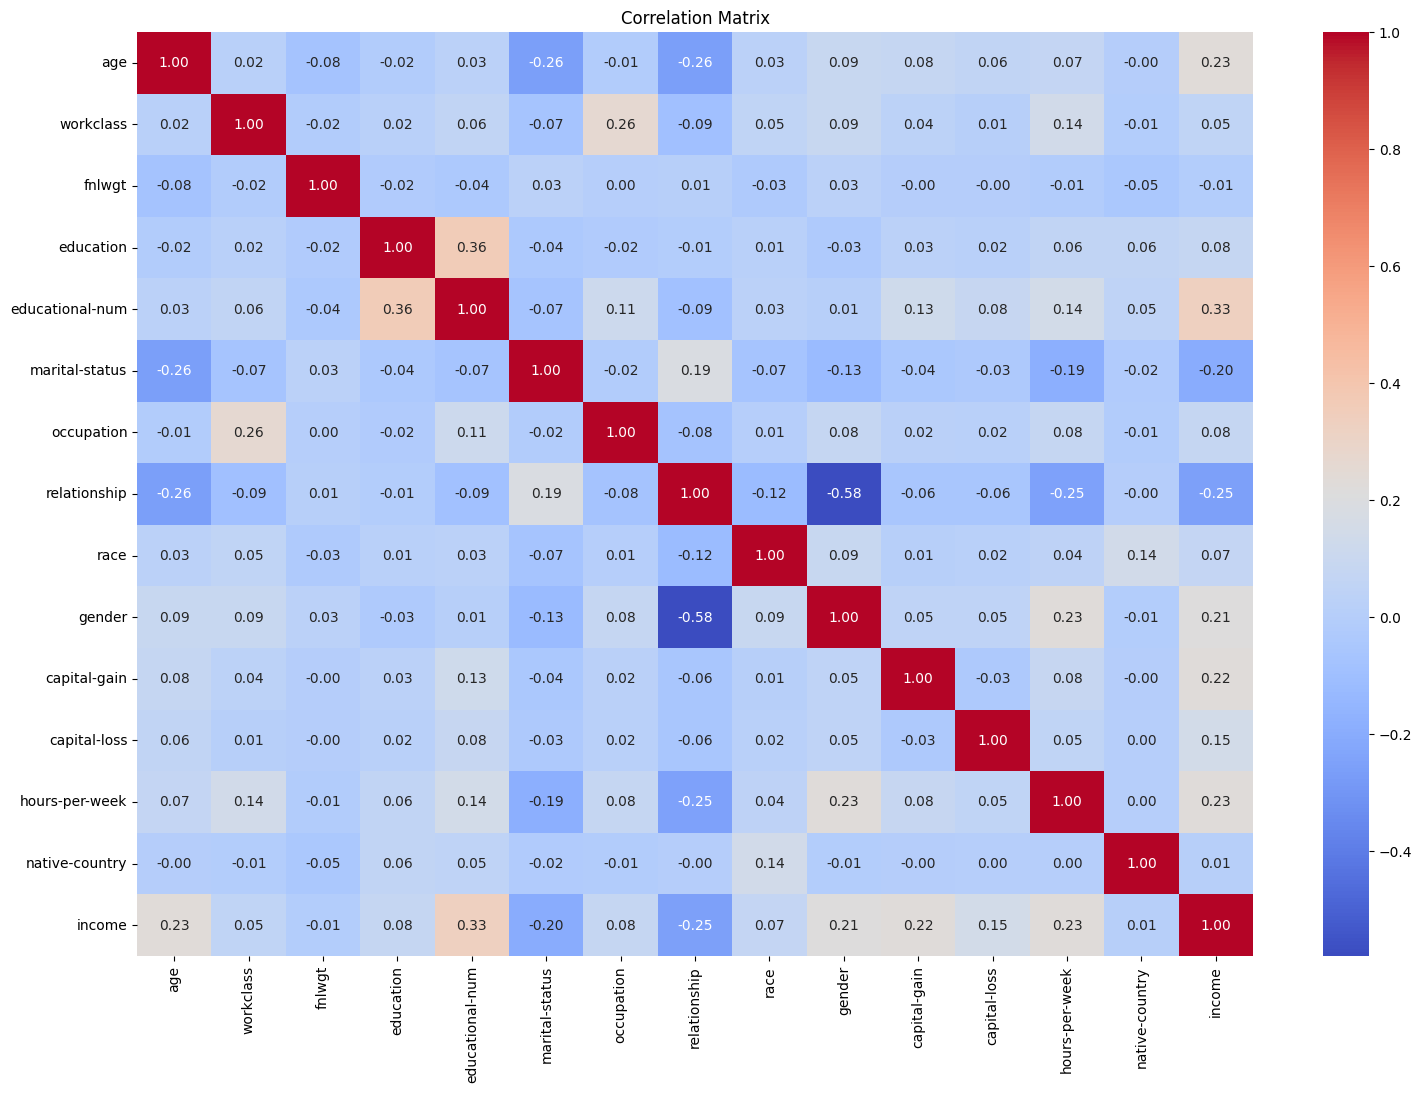

In [43]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded = df.copy()

for col in df_encoded.select_dtypes(include=['object', 'category']):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

corr = df_encoded.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Data Pre-processing



## One-Hot Encoding



In [109]:
categorical_cols = ['occupation', 'workclass', 'marital-status', 'relationship', 'race', 'native-country']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=False, dtype=int)

df.head()


,age,fnlwgt,education,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,11th,7,Male,0,0,40,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,HS-grad,9,Male,0,0,50,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,Assoc-acdm,12,Male,0,0,40,>50K,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,Some-college,10,Male,7688,0,40,>50K,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,Some-college,10,Female,0,0,30,<=50K,1,...,0,0,0,0,0,0,0,1,0,0


In [110]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>=50K' else 0)
df = df.drop('education', axis = 1)
df = df.drop('fnlwgt', axis = 1)

In [111]:
df.head(2)

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Feature Selection

In [97]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index

df_dropped = df.drop(cols_to_drop, axis=1)

df_dropped

,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48840,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<Axes: >

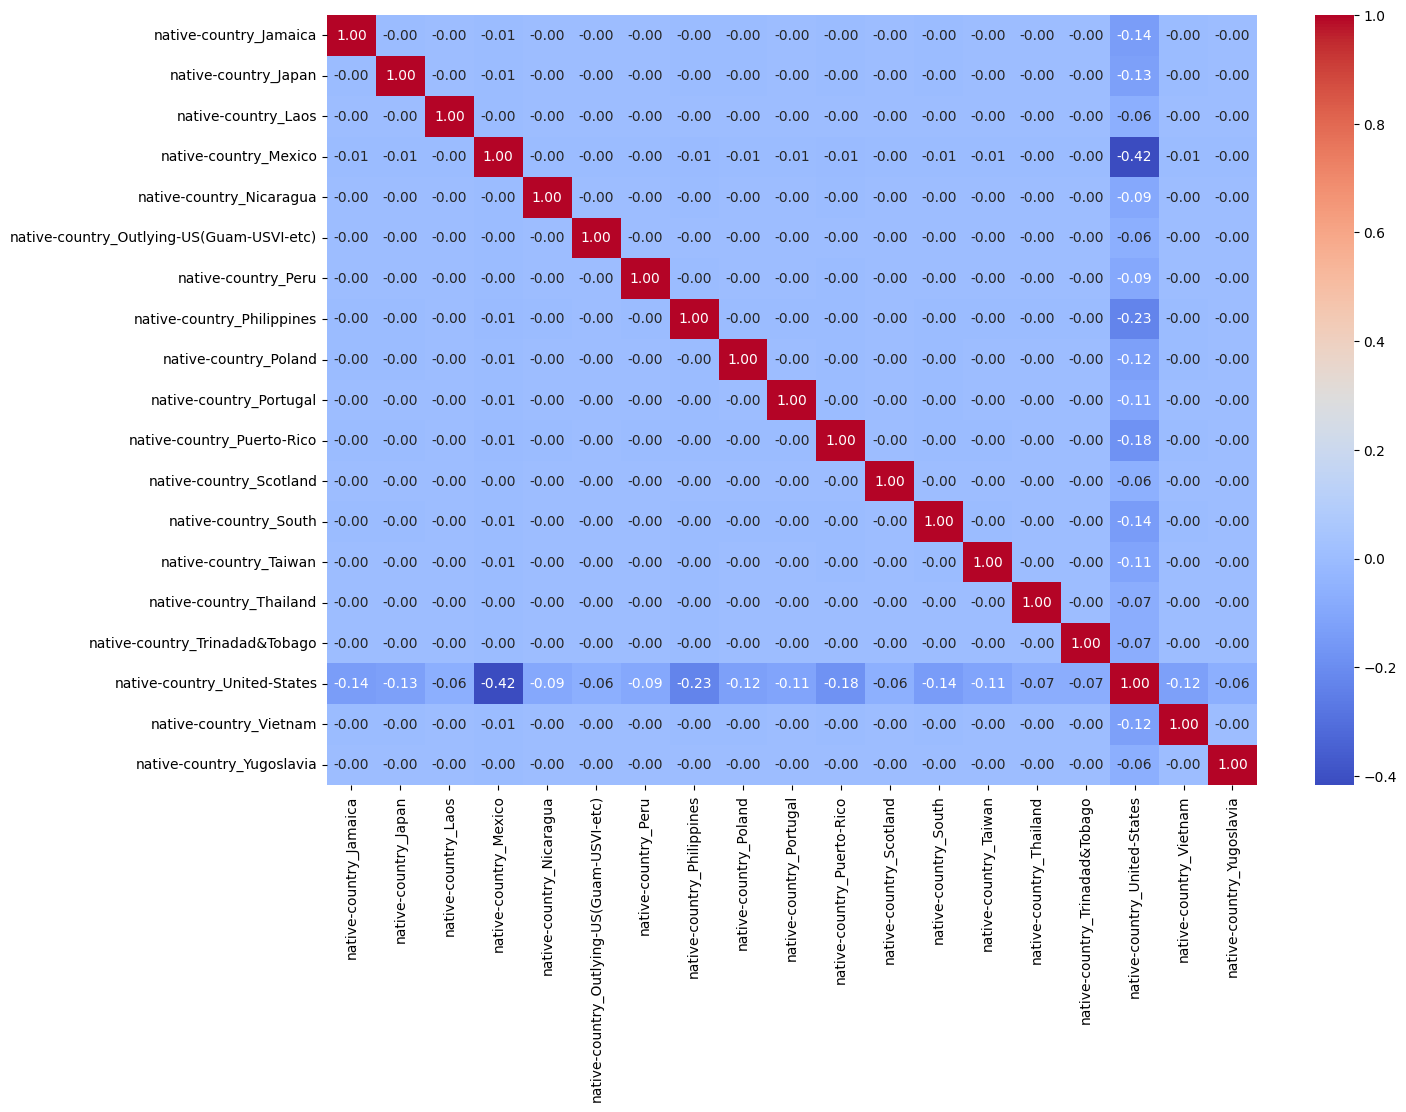

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
sns.heatmap(df_dropped.corr(), annot = True, cmap = 'coolwarm', fmt=".2f")

# Model Training

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [113]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42)

In [114]:
train_X = train_df.drop('income', axis = 1)
train_y = train_df['income']

test_X = test_df.drop('income', axis = 1)
test_y = test_df['income']

In [115]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [116]:
forest.score(test_X, test_y)

1.0

In [98]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = (sorted(importances.items(), key = lambda x: x[1], reverse = True))

In [99]:
importances

[('age', np.float64(0.0)),
 ('educational-num', np.float64(0.0)),
 ('gender', np.float64(0.0)),
 ('capital-gain', np.float64(0.0)),
 ('capital-loss', np.float64(0.0)),
 ('hours-per-week', np.float64(0.0)),
 ('occupation_?', np.float64(0.0)),
 ('occupation_Adm-clerical', np.float64(0.0)),
 ('occupation_Armed-Forces', np.float64(0.0)),
 ('occupation_Craft-repair', np.float64(0.0)),
 ('occupation_Exec-managerial', np.float64(0.0)),
 ('occupation_Farming-fishing', np.float64(0.0)),
 ('occupation_Handlers-cleaners', np.float64(0.0)),
 ('occupation_Machine-op-inspct', np.float64(0.0)),
 ('occupation_Other-service', np.float64(0.0)),
 ('occupation_Priv-house-serv', np.float64(0.0)),
 ('occupation_Prof-specialty', np.float64(0.0)),
 ('occupation_Protective-serv', np.float64(0.0)),
 ('occupation_Sales', np.float64(0.0)),
 ('occupation_Tech-support', np.float64(0.0)),
 ('occupation_Transport-moving', np.float64(0.0)),
 ('workclass_?', np.float64(0.0)),
 ('workclass_Federal-gov', np.float64(0.0))

In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, verbose=10)

In [103]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5; 1/60] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/60] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=1.000 total time=   0.3s
[CV 2/5; 1/60] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/60] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=1.000 total time=   0.2s
[CV 3/5; 1/60] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/60] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=1.000 total time=   0.2s
[CV 4/5; 1/60] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/60] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=1.000 total time=   0.2s
[CV 5/5; 1/60] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [104]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=50)

In [106]:
forest = grid_search.best_estimator_
forest.score(test_X, test_y)

1.0